# Problem 1 (10 points)

a. Using a constitutive model for an isotropic elastic solid that relates strains to applied effective stresses corrected by Biot's coefficient, assume you have a sample in subsurface subjected to overburden, and that confinement in both horizontal principal directions is so large that the horizontal strains are nearly zero. Derive elastic equations for horizontal stresses (use the variables $x$ and $y$ for horizontal directions) in terms of vertical loading as a function of depth (in $z$ direction).

**Solution**

Hooke's law

\begin{align}
\sigma_{xx} = \lambda (\varepsilon_{xx} + \varepsilon_{yy} + \varepsilon_{zz}) + 2 \mu \varepsilon_{xx} \\
\sigma_{yy} = \lambda (\varepsilon_{xx} + \varepsilon_{yy} + \varepsilon_{zz}) + 2 \mu \varepsilon_{yy} \\
\sigma_{zz} = \lambda (\varepsilon_{xx} + \varepsilon_{yy} + \varepsilon_{zz}) + 2 \mu \varepsilon_{zz}
\end{align}

Substituting the assumptions from the problem statement

\begin{align}
\sigma_{H} = \lambda \varepsilon_{v} \\
\sigma_{H} = \lambda \varepsilon_{v}  \\
\sigma_{v} = \lambda \varepsilon_{v} + 2 \mu \varepsilon_{v} = (\lambda + 2 \mu) \varepsilon_v
\end{align}

Solving the third equation for $\varepsilon_{v}$

$$
\varepsilon_v = \frac{\sigma_{v}}{(\lambda + 2 \mu)}
$$

Substituting into one of the others

$$
\sigma_{H} = \frac{\lambda \sigma_{v}}{(\lambda + 2 \mu)} 
$$

and using the relationship 

$$
\lambda = \frac{2 \mu \nu}{1 - 2 \nu}
$$

and simplifying

$$
\sigma_{H} = \frac{\nu \sigma_{v}}{\nu - 1} = \frac{\nu \bar{\rho}g z}{\nu - 1}
$$

and using the Biot's effective stress relationship we have:

$$
S_{H} = \frac{\nu (S_{v} - \alpha P_p)}{1 - \nu}  +  \alpha P_p
$$

b. Assume you are at depth of $4$ km and the pore pressure at that depth is hydrostatic. Using the equations derived in a) above, Biot's parameter of $\alpha=0.7$, and a Poisson’s ratio $\nu=0.2$, estimate the horizontal stress magnitudes $S_{hmin}=S_{Hmax}$ at that depth. 

**Solution**

\begin{align}
S_{H}  &= \frac{0.2 (92 \mbox{ MPa} - 0.7 \cdot 40 \mbox{ MPa})}{1 - \cdot 0.2}  +  0.7 \cdot 40 \mbox{ MPa} \\
S_{H}  &= 44 \mbox{ MPa} \\
\end{align}

# Problem 2 (30 points)

Bernabe and Brace (1990) in their article "Deformation and fracture of Berea Sandstone" reported a number of triaxial test measurements for Berea sandstone, and some of them are given in the table below (all data in MPa).

|$S_3$ (confining pressure) | $P_p$ (pore pressure) | $S_1-S_3$ (differential stress) |
|---------------------------|-----------------------|---------------------------------|
|10|0|116|
|50|0|227|
|20|8|119|
|45|8|183|
|60|8|206|
|75|8|228|
|50|37|120|
|50|32|141|
|90|64|161|
|90|55|187|
|130|96|186|
|130|84|207|

Fit this data to Mohr-Coulomb criterion to compute unconfined compressive strength $C_0$ and internal friction coefficient $\mu_i$ for Berea sandstone.


**Solution**

First we create a curve fit and then use Eq. 4.5 from the book to find the internal friction and extrapolate $C_0$.

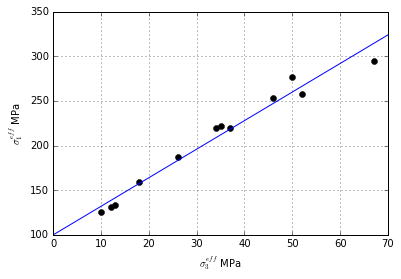

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.array([[10, 0, 116], [50, 0, 227], [20, 8, 119], [45, 8, 183], 
                 [60, 8, 206], [75, 8, 228], [50, 37, 120], [50, 32, 141],
                 [90, 64, 161], [90, 55, 187], [130, 96, 186], [130, 84, 207]])

S3_eff = data[:,0] - data[:,1]
S1_eff = data[:,2] + data[:,0] - data[:,1]

z = np.polyfit(S3_eff, S1_eff, 1)

nfun = np.poly1d(z)

line_x = np.linspace(0,70, num=100)
line_y = nfun(line_x)

plt.plot(S3_eff, S1_eff, 'ko', line_x, line_y, 'b-');
plt.grid()
plt.xlabel('$\sigma_3^{eff}$ MPa')
plt.ylabel('$\sigma_1^{eff}$ MPa');

In [2]:
print(z[1])

print((z[0] - 1) / 2 / np.sqrt(z[0]))

100.080890436
0.614932136531


From the polynomial fit

$C_0 = 100$ MPa

and from the computation above

$\mu_I = 0.61$

# Problem 3 (20 points)

Given:

 * $S_{Hmax} = 90$ MPa
 * $S_{hmin} = 51.5$ MPa
 * $P_p = P_w = 31.5$ MPa
 
Recreate Figure 6.2 in Zoback, also shown [here](http://johnfoster.pge.utexas.edu/PGE334-ResGeomechanics/slides/Lecture17.slides.html#/3).

**Solution**

In [3]:
def sigma_TT(SHmax, Shmin, Pp, Pm, a, r, theta):
    
    sigma_Hmax = SHmax - Pp
    sigma_hmin = Shmin - Pp
    
    return ((sigma_Hmax + sigma_hmin) / 2. * (1. + a ** 2. / r ** 2.) - 
            (sigma_Hmax - sigma_hmin) / 2. * (1. + 3. * a ** 4. / r ** 4.) * np.cos( 2 * theta ) -
            (Pm - Pp) * a ** 2. / r ** 2.)

In [4]:
a = 0.2302 #8 in. in meters
SHmax = 90
Shmin = 51.5
Pp = 31.5
Pm = 31.5

#Increasing N gives smoother plots
N = 500
j = np.complex(1.0)

#Discretizing r and theta
r = np.linspace(a, 2*a, num=N)
theta = np.linspace(0, 2. * np.pi * np.pi, num=N)

#Calculate the field values
x = r * np.cos(theta[:,None])
y = r * np.sin(theta[:,None])
z = sigma_TT(SHmax, Shmin, Pp, Pm, a, r, theta[:,None])

We have to interpolate the data from polar coordinates onto a regular cartesian grid.

In [5]:
from scipy.interpolate import griddata

XX, YY = np.mgrid[-2*a:2*a:N*j,-2*a:2*a:N*j]

ZZ = griddata((x.ravel(),y.ravel()), z.ravel(), (XX, YY))

Now we plot the result, removing any of the interpolated values inside the wellbore

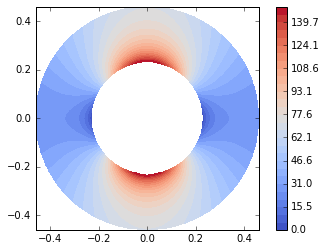

In [6]:
interior = np.sqrt(XX ** 2.+ YY ** 2.) < a
ZZ[interior] = np.nan

plt.figure()
plt.gca().set_aspect('equal')
plt.contourf(XX, YY, ZZ, cmap="coolwarm", levels=np.linspace(0, 150, 30))
plt.colorbar();